## Model Building using Logistic Regression and Decision Tree and Random Forest on Employee Attrition DataSet

### Loading the Dataset

In [1]:
#Import the Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv") #loading the dataset

### Data Preprocessing

In [3]:
data.head() # displaying the head of the dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.tail() # displaying the tail of the dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
data.shape #shape of the dataset

(1470, 35)

In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
data.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [9]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
data.corr() # correlation matrix of the dataset

C:\Users\HP\AppData\Local\Temp\ipykernel_3060\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [11]:
data.drop(["EmployeeCount","StandardHours"],axis="columns",inplace=True) #droping the columns that are not required for building the model

In [12]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [13]:
data.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_3060\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


C:\Users\HP\AppData\Local\Temp\ipykernel_3060\3365494006.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

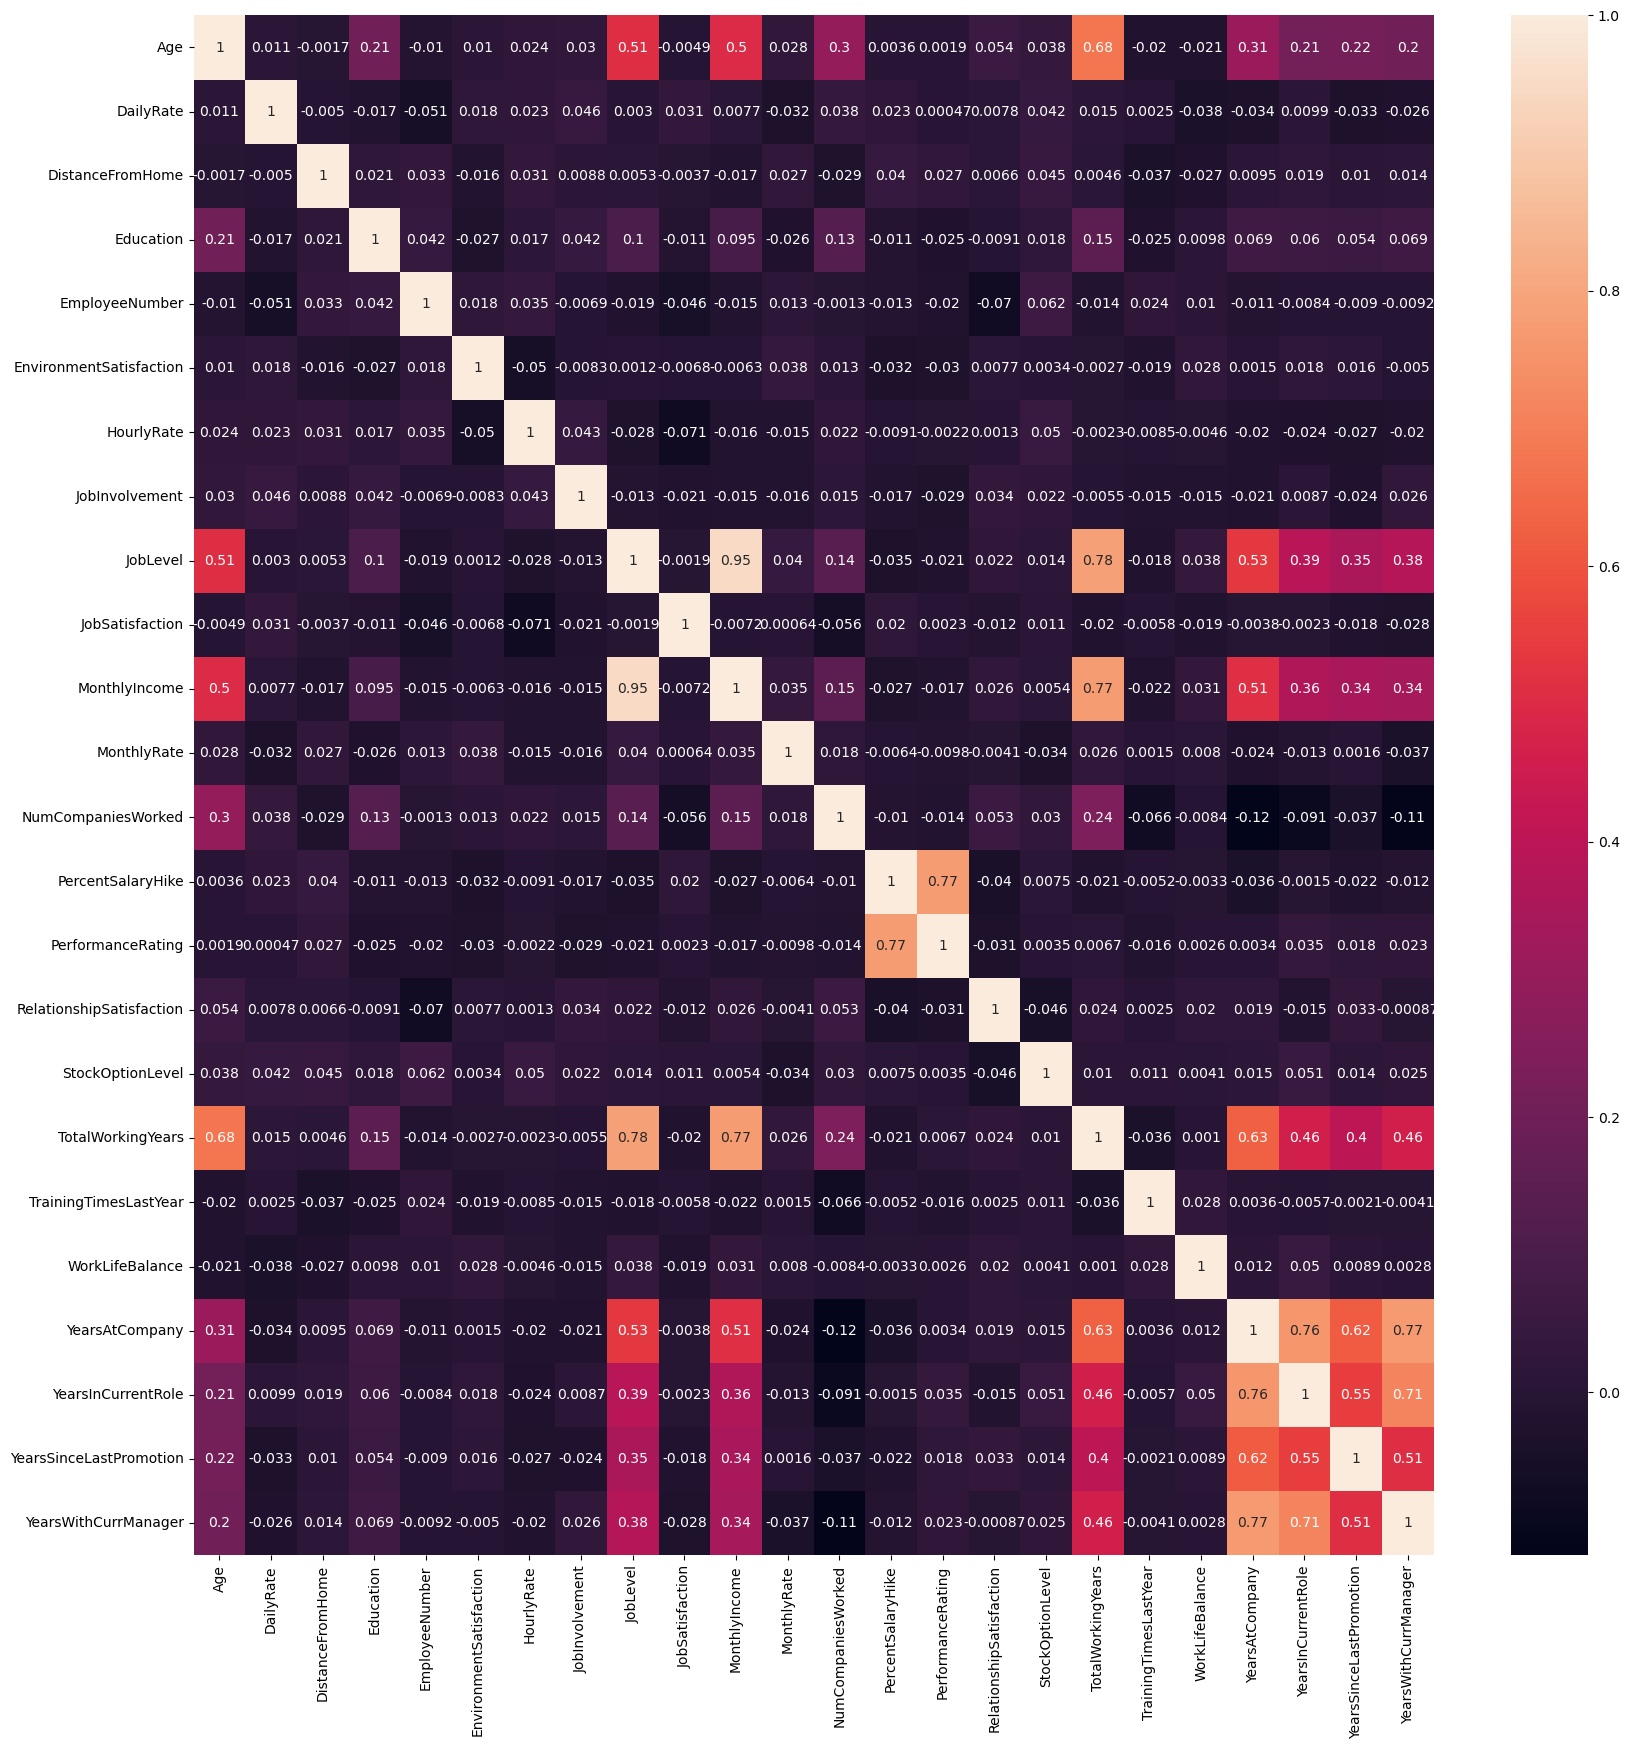

In [14]:
plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

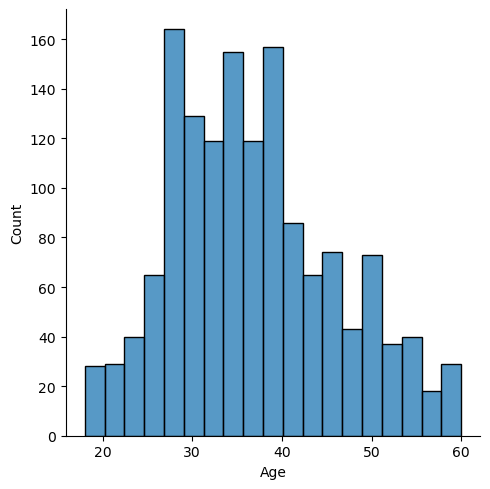

In [15]:
sns.displot(x="Age",data=data) # distribution plot of the Age column

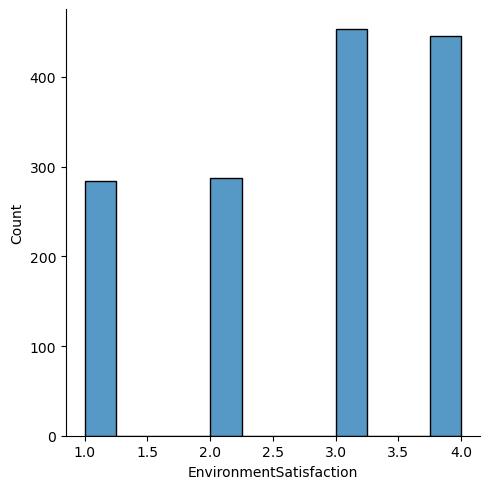

In [16]:
sns.displot(x="EnvironmentSatisfaction",data=data) # distribution of the EnvironmentSatisfaction data

<Axes: xlabel='TotalWorkingYears', ylabel='count'>

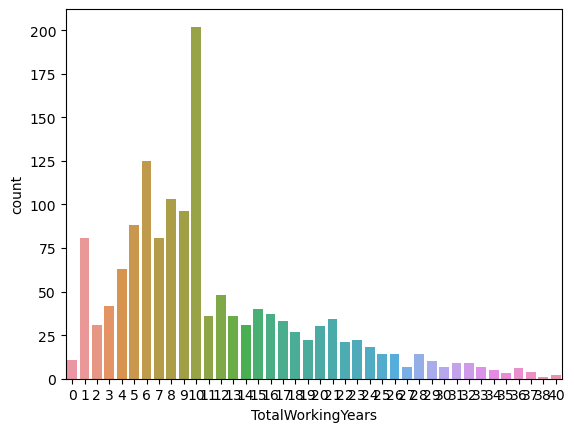

In [17]:
sns.countplot(x="TotalWorkingYears",data=data) # countplot of the TotalWorkingyears

<Axes: xlabel='Attrition', ylabel='TotalWorkingYears'>

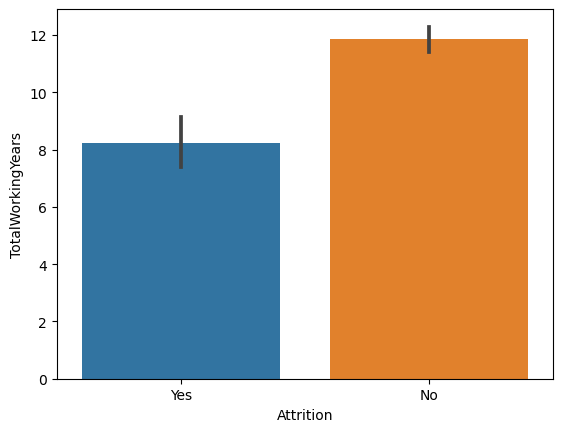

In [18]:
sns.barplot(y="TotalWorkingYears",x="Attrition",data=data) #brplot of the TotalWorking Years

Import the Libraries.
    o	Importing the dataset.
    o	Checking for Null Values.
    o	Data Visualization.
    o	Outlier Detection
    o	Splitting Dependent and Independent variables
    o	Perform Encoding
    o	Feature Scaling.
    o	Splitting Data into Train and Test

<Axes: >

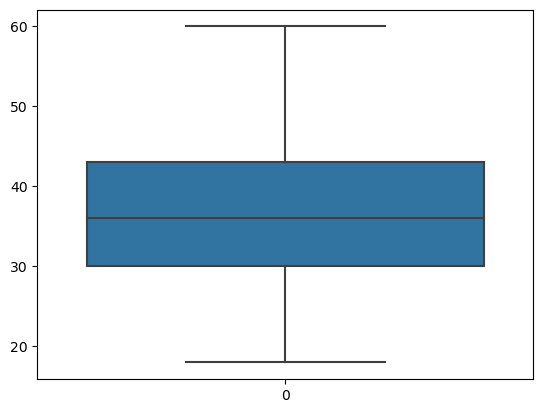

In [19]:
sns.boxplot(data.Age)

<Axes: >

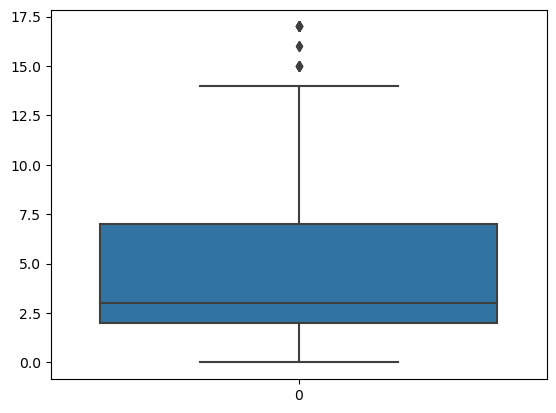

In [20]:
sns.boxplot(data.YearsWithCurrManager)

<Axes: >

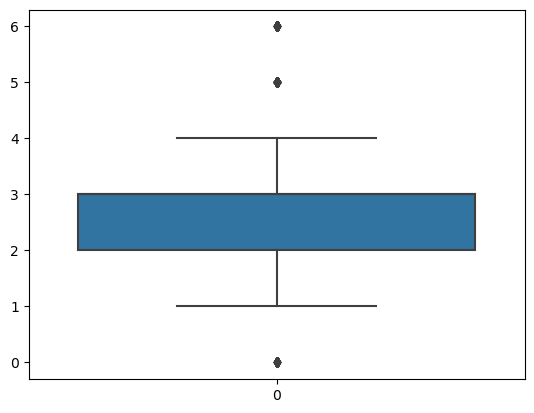

In [21]:
sns.boxplot(data.TrainingTimesLastYear)

<Axes: >

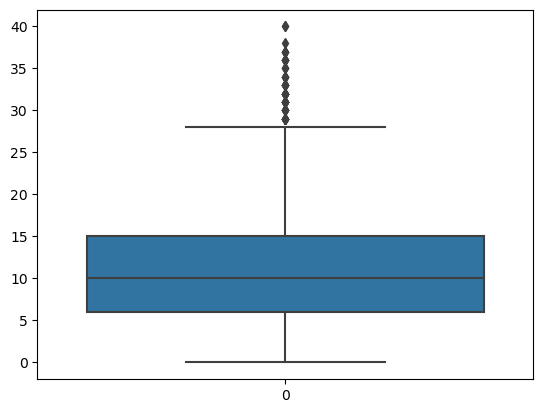

In [22]:
sns.boxplot(data.TotalWorkingYears)

<Axes: >

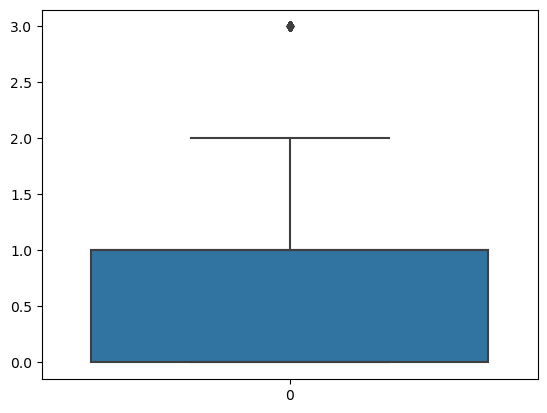

In [23]:
sns.boxplot(data.StockOptionLevel)

<Axes: >

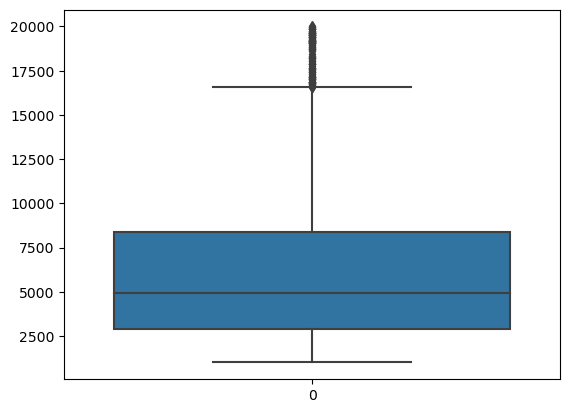

In [24]:
sns.boxplot(data.MonthlyIncome)

<Axes: >

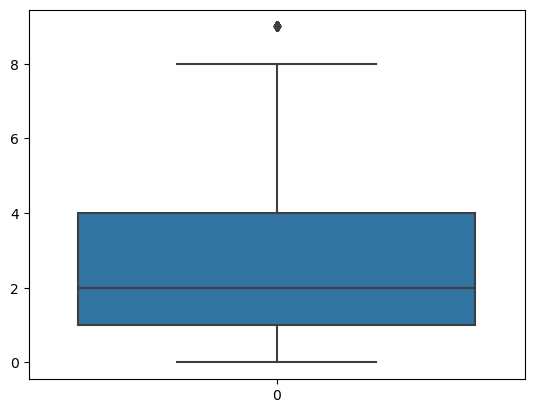

In [26]:
sns.boxplot(data.NumCompaniesWorked)

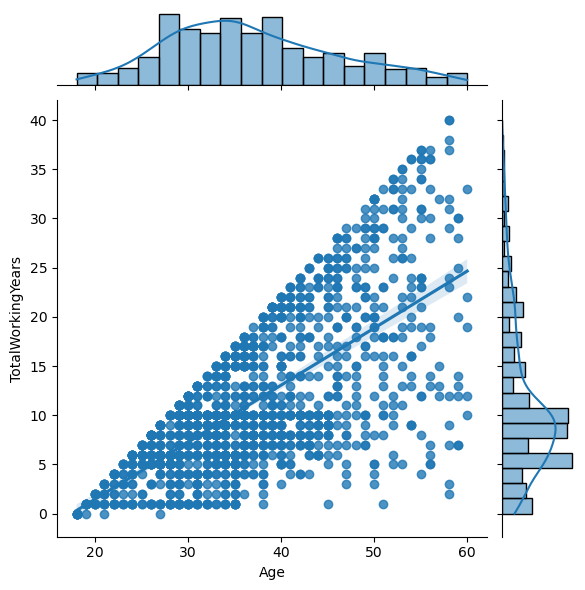

In [27]:
sns.jointplot(x="Age",y="TotalWorkingYears",data=data,kind="reg")

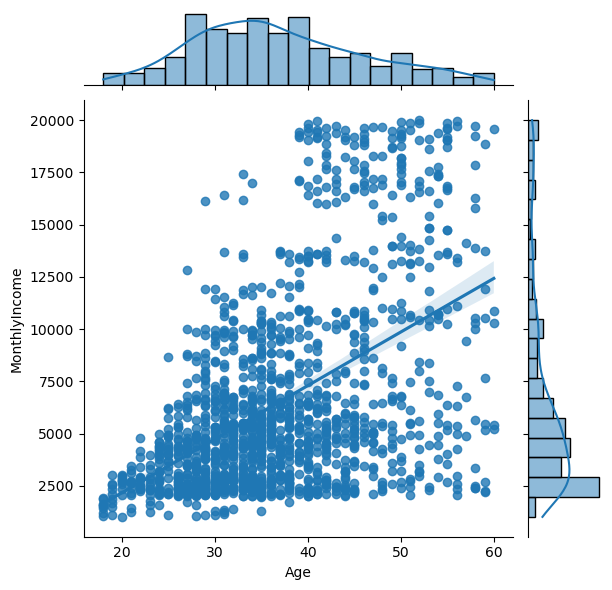

In [28]:
sns.jointplot(x="Age",y="MonthlyIncome",data=data,kind="reg")

## splitting the data into dependent and independent Variables

In [29]:
x=data.drop("Attrition",axis=1) 

In [30]:
x.shape[1]

32

In [31]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [32]:
y=data.Attrition

In [33]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

## encoding the values in the test data 

In [36]:
b=pd.get_dummies(x["BusinessTravel"],drop_first=True)

In [37]:
b

,Travel_Frequently,Travel_Rarely
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
1465,1,0
1466,0,1
1467,0,1
1468,1,0


In [38]:
x=pd.concat([x,b],axis=1)

In [39]:
x.drop(["BusinessTravel"],axis=1,inplace=True)

In [40]:
x.head()

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely
0,41,1102,Sales,1,2,Life Sciences,1,2,Female,94,...,0,8,0,1,6,4,0,5,0,1
1,49,279,Research & Development,8,1,Life Sciences,2,3,Male,61,...,1,10,3,3,10,7,1,7,1,0
2,37,1373,Research & Development,2,2,Other,4,4,Male,92,...,0,7,3,3,0,0,0,0,0,1
3,33,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,...,0,8,3,3,8,7,3,0,1,0
4,27,591,Research & Development,2,1,Medical,7,1,Male,40,...,1,6,3,3,2,2,2,2,0,1


In [41]:
c=pd.get_dummies(x["Department"],drop_first=True)

In [42]:
c

,Research & Development,Sales
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1465,1,0
1466,1,0
1467,1,0
1468,0,1


In [43]:
x=pd.concat([x,c],axis=1)

In [44]:
x.drop(["Department"],axis=1,inplace=True)

In [45]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely,Research & Development,Sales
0,41,1102,1,2,Life Sciences,1,2,Female,94,3,...,0,1,6,4,0,5,0,1,0,1
1,49,279,8,1,Life Sciences,2,3,Male,61,2,...,3,3,10,7,1,7,1,0,1,0
2,37,1373,2,2,Other,4,4,Male,92,2,...,3,3,0,0,0,0,0,1,1,0
3,33,1392,3,4,Life Sciences,5,4,Female,56,3,...,3,3,8,7,3,0,1,0,1,0
4,27,591,2,1,Medical,7,1,Male,40,3,...,3,3,2,2,2,2,0,1,1,0


In [46]:
d=pd.get_dummies(x["EducationField"],drop_first=True)

In [47]:
x=pd.concat([x,d],axis=1)

In [48]:
x.drop(["EducationField"],axis=1,inplace=True)

In [49]:
e=pd.get_dummies(x["Gender"],drop_first=True)

In [50]:
x=pd.concat([x,e],axis=1)

In [51]:
x.drop(["Gender"],axis=1,inplace=True)

In [52]:
f=pd.get_dummies(x["JobRole"],drop_first=True)

In [53]:
x=pd.concat([x,f],axis=1)

In [54]:
x.drop(["JobRole"],axis=1,inplace=True)

In [55]:
g=pd.get_dummies(x["MaritalStatus"],drop_first=True)

In [56]:
x=pd.concat([x,g],axis=1)

In [57]:
x.drop(["MaritalStatus"],axis=1,inplace=True)

In [58]:
g=pd.get_dummies(x["Over18"],drop_first=True)

In [59]:
x=pd.concat([x,g],axis=1)

In [60]:
x.drop(["Over18"],axis=1,inplace=True)

In [61]:
g=pd.get_dummies(x["OverTime"],drop_first=True)

In [62]:
x=pd.concat([x,g],axis=1)

In [63]:
x.drop(["OverTime"],axis=1,inplace=True)

In [64]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single,Yes
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,2,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,5,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,7,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0


## scaling the values of the dataset 

In [66]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [67]:
x=sc.fit_transform(x)

In [68]:
x

array([[ 0.4463504 ,  0.74252653, -1.01090934, ..., -0.91892141,
         1.45864991,  1.59174553],
       [ 1.32236521, -1.2977746 , -0.14714972, ...,  1.08823234,
        -0.68556546, -0.62824112],
       [ 0.008343  ,  1.41436324, -0.88751511, ..., -0.91892141,
         1.45864991,  1.59174553],
       ...,
       [-1.08667552, -1.60518328, -0.64072665, ...,  1.08823234,
        -0.68556546,  1.59174553],
       [ 1.32236521,  0.54667746, -0.88751511, ...,  1.08823234,
        -0.68556546, -0.62824112],
       [-0.32016256, -0.43256792, -0.14714972, ...,  1.08823234,
        -0.68556546, -0.62824112]])

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [70]:
x_train

array([[ 2.30788188, -0.48958727,  1.45697529, ...,  1.08823234,
        -0.68556546,  1.59174553],
       [ 0.88435781,  0.36570299,  2.32073492, ...,  1.08823234,
        -0.68556546, -0.62824112],
       [ 0.33684855, -1.24571346,  2.07394645, ...,  1.08823234,
        -0.68556546, -0.62824112],
       ...,
       [ 0.66535411,  0.93341741, -0.88751511, ...,  1.08823234,
        -0.68556546,  1.59174553],
       [ 0.11784485, -1.32504473, -0.88751511, ...,  1.08823234,
        -0.68556546,  1.59174553],
       [ 0.33684855, -0.35819486,  0.09963874, ..., -0.91892141,
        -0.68556546, -0.62824112]])

## Building Logistic Regression Model

In [201]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [202]:
model.fit(x_train,y_train)

LogisticRegression()

In [203]:
pred=model.predict(x_test)

In [204]:
pred

array(['No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', '

In [206]:
#Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [205]:
accuracy_score(y_test,pred) # displaying the accuracy score

0.8775510204081632

In [207]:
confusion_matrix(y_test,pred)

array([[238,   7],
       [ 29,  20]], dtype=int64)

In [208]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.89      0.97      0.93       245
         Yes       0.74      0.41      0.53        49

    accuracy                           0.88       294
   macro avg       0.82      0.69      0.73       294
weighted avg       0.87      0.88      0.86       294



## parameter Tuning for Logistic Regression

In [211]:
# Create your Logistic Regression model with an appropriate solver, penalty, and max_iter
logistic_regression = LogisticRegression(solver='saga', penalty='l1', max_iter=1000)

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')


In [212]:
grid_search.fit(x_train, y_train)

# Print best hyperparameters
print(grid_search.best_params_)

# Print best score
print(grid_search.best_score_)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which 

{'C': 1}
0.8843490804183196


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [213]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [214]:
accuracy_score(y_test,y_pred)

0.8809523809523809

In [215]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.89      0.97      0.93       245
         Yes       0.75      0.43      0.55        49

    accuracy                           0.88       294
   macro avg       0.82      0.70      0.74       294
weighted avg       0.87      0.88      0.87       294



In [216]:
probability=model.predict_proba(x_test)[:,1]

In [217]:
probability

array([6.61367680e-02, 8.06198087e-02, 5.95640954e-01, 1.42633628e-01,
       7.84184536e-01, 4.42409704e-02, 4.90141163e-01, 3.64319554e-02,
       8.44925839e-04, 4.30164151e-01, 3.70048030e-02, 1.96283567e-01,
       1.51964558e-02, 5.39471444e-01, 5.88816107e-02, 1.18804547e-02,
       1.13489514e-01, 3.82574810e-02, 2.32011787e-02, 2.66149260e-01,
       1.31568762e-01, 9.99913247e-03, 1.30286201e-02, 3.88975456e-02,
       7.51582081e-01, 4.58920880e-01, 6.43869830e-02, 2.97280577e-02,
       6.90209855e-01, 3.77607239e-02, 5.59306642e-03, 3.05902665e-01,
       3.65028773e-02, 3.90288488e-02, 2.27899092e-02, 5.90358760e-03,
       2.32731579e-01, 5.29386349e-02, 1.38241033e-02, 1.13353905e-01,
       3.42777217e-02, 8.33820691e-03, 1.07151981e-03, 5.52578825e-03,
       8.80282261e-03, 5.59254552e-01, 4.21978392e-01, 5.99712843e-04,
       4.00447399e-01, 3.68527002e-01, 3.55627577e-02, 8.16716675e-01,
       1.58976261e-02, 3.55101528e-01, 4.94410470e-01, 2.54453615e-01,
      

In [218]:
y_tt=y_test.map({"Yes":1,"No":0})

In [219]:
# roc_curve
fpr,tpr,threshsholds = roc_curve(y_tt,probability)

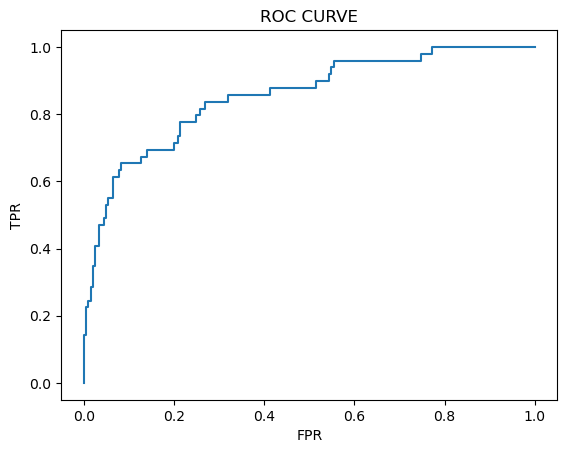

In [220]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

## Decision Tree Classifier 

In [300]:
# importing the required functions to build a model
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [301]:
# fittig the training data with model
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [302]:
# predicting the target value
pred=dtc.predict(x_test)

In [303]:
pred # predicted values

array(['No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No

In [304]:
accuracy_score(y_test,pred) # accuracy of the model built

0.8061224489795918

In [305]:
confusion_matrix(y_test,pred) # confusion matrix og the model

array([[218,  27],
       [ 30,  19]], dtype=int64)

In [306]:
print(classification_report(y_test,pred)) # classification report of the model

              precision    recall  f1-score   support

          No       0.88      0.89      0.88       245
         Yes       0.41      0.39      0.40        49

    accuracy                           0.81       294
   macro avg       0.65      0.64      0.64       294
weighted avg       0.80      0.81      0.80       294



In [307]:
probability=dtc.predict_proba(x_test)[:,1] # postive class probabilities

In [308]:
# roc_curve
fpr,tpr,threshsholds = roc_curve(y_tt,probability)

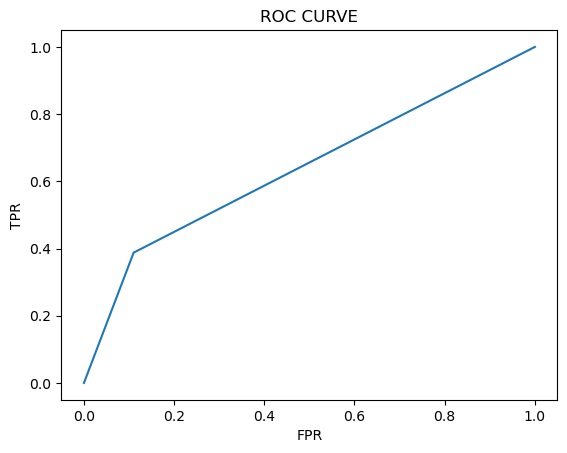

In [309]:
plt.plot(fpr,tpr)  # plotting the ROC curve
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

[Text(0.3331172771403354, 0.96875, 'x[17] <= -1.257\ngini = 0.269\nsamples = 1176\nvalue = [988, 188]'),
 Text(0.09179170344218888, 0.90625, 'x[43] <= 0.387\ngini = 0.5\nsamples = 78\nvalue = [39, 39]'),
 Text(0.0529567519858782, 0.84375, 'x[2] <= 0.902\ngini = 0.426\nsamples = 39\nvalue = [27, 12]'),
 Text(0.0353045013239188, 0.78125, 'x[24] <= 0.797\ngini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(0.02118270079435128, 0.71875, 'x[9] <= -1.114\ngini = 0.198\nsamples = 27\nvalue = [24, 3]'),
 Text(0.01412180052956752, 0.65625, 'x[44] <= 0.482\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.00706090026478376, 0.59375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.02118270079435128, 0.59375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.02824360105913504, 0.65625, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.04942630185348632, 0.71875, 'x[10] <= -0.985\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.04236540158870256, 0.65625, 'gini = 0.0\nsamples = 1\

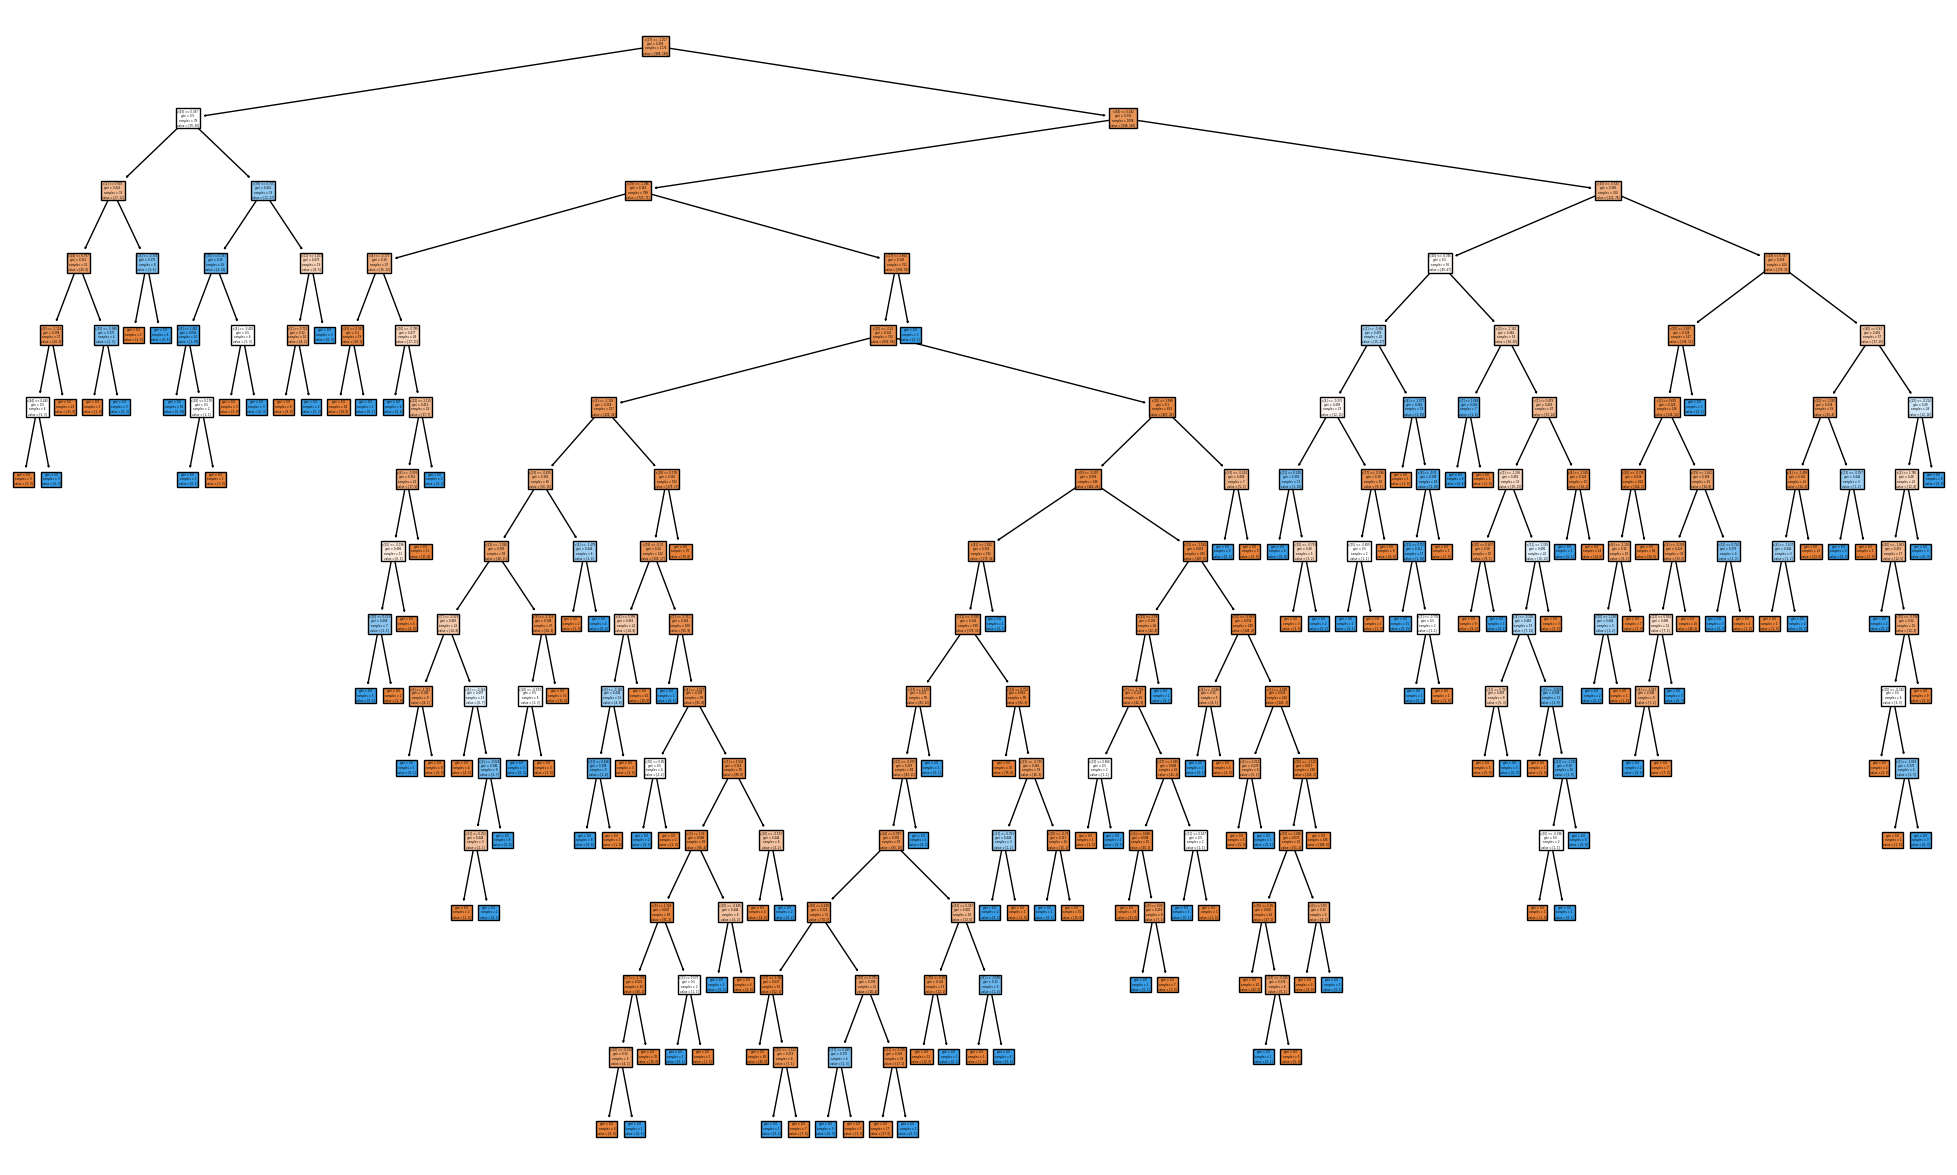

In [310]:
# Decision tree
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(dtc,filled=True)

## parameter tuning for Decision tree Classifier

In [348]:
# Paramter tuning with gridsearcg CV
from sklearn.model_selection import GridSearchCV
parameter={
 'criterion':['gini','entropy'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [349]:
grid_search=GridSearchCV(estimator=dtc,param_grid=parameter,cv=5,scoring="accuracy")  

In [350]:
grid_search.fit(x_train,y_train) # fitting the data 

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\util

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [351]:
grid_search.best_params_ # finding the best parameters

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [355]:
dtc_cv.fit(x_train,y_train) # fitting the data 

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt')

In [356]:
print(classification_report(y_test,pred)) # displaying the classififcation report 

              precision    recall  f1-score   support

          No       0.83      1.00      0.91       245
         Yes       0.00      0.00      0.00        49

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.69      0.83      0.76       294



## Random Forest Classifier

In [333]:
from sklearn.ensemble import RandomForestClassifier # building the randomforest classifier 
rfc=RandomForestClassifier()

In [334]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}] # giving the parameters as the input

In [335]:
rfc_cv= GridSearchCV(rfc,param_grid=forest_params,cv=10,scoring="accuracy") # finding the best parameters for the model

In [336]:
rfc_cv.fit(x_train,y_train) #fitting the data to the model

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [340]:
pred=rfc_cv.predict(x_test) # prediciting the target variable

In [341]:
accuracy_score(y_test,pred)

0.8537414965986394

In [342]:
confusion_matrix(y_test,pred) # confusion matrix og the model

array([[241,   4],
       [ 39,  10]], dtype=int64)

In [343]:
print(classification_report(y_test,pred)) # displaying the classification  report

              precision    recall  f1-score   support

          No       0.86      0.98      0.92       245
         Yes       0.71      0.20      0.32        49

    accuracy                           0.85       294
   macro avg       0.79      0.59      0.62       294
weighted avg       0.84      0.85      0.82       294



In [344]:
probability=rfc_cv.predict_proba(x_test)[:,1]

In [345]:
fpr,tpr,threshsholds = roc_curve(y_tt,probability)

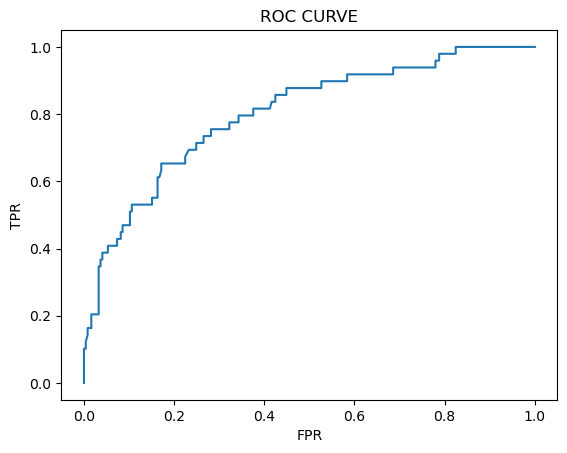

In [346]:
plt.plot(fpr,tpr)  # plotting the ROC curve
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()